In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
h = 0.67
Theta_CMB = 1

def alpha_c_func(Omega_b, Omega_c):
    Omega_0 = Omega_b+Omega_c
    a1 = (46.9*Omega_0*h**2)**(0.67)*(1+(32.1*Omega_0*h**2)**(-0.532))
    a2 = (12*Omega_0*h**2)**(0.424)*(1+(45*Omega_0*h**2)**(-0.582))

    alphac = a1**(-Omega_b/Omega_0)*a2**(-(Omega_b/Omega_0)**3)
    return alphac

def beta_c_func(Omega_b, Omega_c):
    Omega_0 = Omega_b+Omega_c
    b1 = 0.944*(1+(458*Omega_0*h)**(-0.708))**(-1)
    b2 = (0.395*Omega_0*h**2)**(-0.0266)
    betac = (1+b1*((Omega_c/Omega_0)**b2-1))**(-1)

    return betac

def k_eq(Omega_b, Omega_c):
    Omega_0 = Omega_b+Omega_c
    return 7.46e-2*Omega_0*h**2*Theta_CMB**(-2) # Unit: Mpc^{-1}

def q_func(k, keq):
    return k/(13.41*keq)

#def C_func(Omega_b, Omega_c, k):
#    keq = k_eq(Omega_b, Omega_c, Theta_CMB)
#    C_value = 14.2/alpha_c(Omega_b, Omega_c)+386/(1+69.9*q_func(k, keq)**(1.08))
#    return C_value

def C_func(alpha_c, q):
    return 14.2/alpha_c+386/(1+69.9*q**1.08)

#def T_tilde_0(Omega_b, Omega_c, k):
#    keq = k_eq(Omega_b, Omega_c, Theta_CMB)
#    T_tilde_0_value = np.log(math.e+1.8*beta_c(Omega_b, Omega_c)*q_func(k, keq))\
#        /(np.log(math.e+1.8*beta_c(Omega_b, Omega_c)*q_func(k, keq))+C_func(Omega_b, Omega_c, Theta_CMB, k)*q_func(k, keq)**2)
#    return T_tilde_0_value

def T_tilde_0(k, alpha_c, beta_c, keq):
    q = q_func(k, keq)
    return np.log(math.e+1.8*beta_c*q)/(np.log(math.e+1.8*beta_c*q)+C_func(alpha_c, q)*q**2)

def R_func(Omega_b, z):
    return 31.5*Omega_b*h**2*Theta_CMB**(-4)*(z/1000)**(-1)

def s_func(Omega_b, Omega_c):
    Omega_0 = Omega_b+Omega_c
    u1 = 0.313*(Omega_0*h**2)**(-0.419)*(1+0.607*(Omega_0*h**2)**0.674)
    u2 = 0.238*(Omega_0*h**2)**0.223
    z_eq = 2.50e4*Omega_0*h**2*Theta_CMB**(-4)
    z_d = 1291*(Omega_0*h**2)**0.251/(1+0.659*(Omega_0*h**2)**0.828)*(1+u1*(Omega_0*h**2)**u2)
    R_eq = R_func(Omega_b, z_eq)
    R_d = R_func(Omega_b, z_d)
    s_value = 2/(3*k_eq(Omega_b, Omega_c))*np.sqrt(6/R_eq)*np.log((np.sqrt(1+R_d)+np.sqrt(R_eq+R_d))/(1+np.sqrt(R_eq)))

    return s_value

def T_c(Omega_b, Omega_c, k):
    alpha_c = alpha_c_func(Omega_b, Omega_c)
    beta_c = beta_c_func(Omega_b, Omega_c)
    keq = k_eq(Omega_b, Omega_c)
    s = s_func(Omega_b, Omega_c)
    f = 1/(1+(k*s/5.4)**4)
    return f*T_tilde_0(k, 1, beta_c, keq)+(1-f)*T_tilde_0(k, alpha_c, beta_c, keq)

def G_func(y):
    return y*(-6*np.sqrt(1+y)+(2+3*y)*np.log((np.sqrt(1+y)+1)/(np.sqrt(1+y)-1)))

def T_b(Omega_b, Omega_c, k):
    Omega_0 = Omega_b+Omega_c
    keq = k_eq(Omega_b, Omega_c)
    s = s_func(Omega_b, Omega_c)
    u1 = 0.313*(Omega_0*h**2)**(-0.419)*(1+0.607*(Omega_0*h**2)**0.674)
    u2 = 0.238*(Omega_0*h**2)**0.223
    z_eq = 2.50e4*Omega_0*h**2*Theta_CMB**(-4)
    z_d = 1291*(Omega_0*h**2)**0.251/(1+0.659*(Omega_0*h**2)**0.828)*(1+u1*(Omega_0*h**2)**u2)
    R_eq = R_func(Omega_b, z_eq)
    R_d = R_func(Omega_b, z_d)
    alpha_b = 2.07*keq*s*(1+R_d)**(-3/4)*G_func((1+z_eq)/(1+z_d))
    beta_b = 0.5+Omega_b/Omega_0+(3-2*Omega_b/Omega_0)*np.sqrt(1+(17.2*Omega_0*h**2)**2)
    k_silk = 1.6*(Omega_b*h**2)**0.52*(Omega_0*h**2)**0.73*(1+(10.4*Omega_0*h**2)**(-0.95)) # Mpc^{-1}
    beta_node = 8.41*(Omega_0*h**2)**0.435

    part1 = T_tilde_0(k, 1, 1, keq)/(1+(k*s/5.2)**2)+alpha_b/(1+(beta_b/(k*s))**3)*np.exp(-(k/k_silk)**(1.4))
    part2 = np.sinc(k*s/(1+(beta_node/(k*s))**3)**(1/3)/np.pi)

    return part1*part2

def T_func(Omega_b, Omega_c, k):
    Omega_0 = Omega_b+Omega_c

    return (Omega_b/Omega_0)*T_b(Omega_b, Omega_c, k)+(Omega_c/Omega_0)*T_c(Omega_b, Omega_c, k)

In [3]:
k_list =  np.linspace(1e-5, 10, 50000)
Omega_b = 0.02242/h**2
Omega_c = 0.11933/h**2

Tranfer_list = []
for i in range(len(k_list)):
    Tranfer_list.append(T_func(Omega_b, Omega_c, k_list[i]))
Tranfer_list = np.array(Tranfer_list)

In [4]:
Omega_b1 = 0.1/h**2
Omega_c1 = 0.11933/h**2

Tranfer_list1 = []
for i in range(len(k_list)):
    Tranfer_list1.append(T_func(Omega_b1, Omega_c1, k_list[i]))
Tranfer_list1 = np.array(Tranfer_list1)

In [5]:
Omega_b2 = 2/h**2
Omega_c2 = 0.11933/h**2

Tranfer_list2 = []
for i in range(len(k_list)):
    Tranfer_list2.append(T_func(Omega_b2, Omega_c2, k_list[i]))
Tranfer_list2 = np.array(Tranfer_list2)

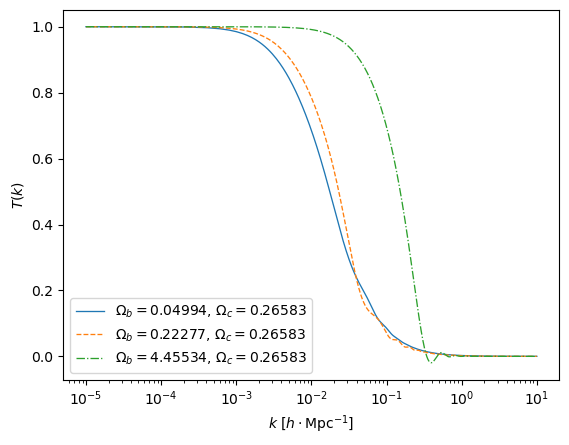

In [6]:
plt.plot(k_list, Tranfer_list, linewidth = 0.95, label= r'$\Omega_b=${:.5f}, $\Omega_c=${:.5f}'.format(Omega_b, Omega_c))
plt.plot(k_list, Tranfer_list1, linewidth = 0.95, label= r'$\Omega_b=${:.5f}, $\Omega_c=${:.5f}'.format(Omega_b1, Omega_c1), linestyle = '--')
plt.plot(k_list, Tranfer_list2, linewidth = 0.95, label= r'$\Omega_b=${:.5f}, $\Omega_c=${:.5f}'.format(Omega_b2, Omega_c2), linestyle = '-.')

plt.xscale('log')
plt.legend()
plt.xlabel(r'$k\ [h\cdot \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$T(k)$')
#plt.savefig('/Users/zengyuhe/academic_doc/Classes/Cosmology/calculation/Cosmology_HW7.pdf')
plt.show()